## sklearn.linear_model.Ridge

* _class_ sklearn.linear_model.Ridge(_alpha=1.0_,  _*_,  _fit_intercept=True_,  _copy_X=True_,  _max_iter=None_,  _tol=0.0001_,  _solver='auto'_,  _positive=False_,  _random_state=None_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/364c77e04/sklearn/linear_model/_ridge.py#L921)[](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge "Permalink to this definition")

> ### Ridge 회귀로 보스턴 집값 예측

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
import seaborn as sns

20. 보스턴 예제 자료 가져오기

In [7]:
# boston 데이터셋 로드
boston= pd.read_csv("C:/apps/ml_7/datasets/Boston.csv", index_col=0)

# boston dataset의 target array는 주택 가격
y_target = boston['medv']
X_data = boston.drop('medv', axis=1)

# print(boston.shape)
# boston.head()

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# Pipeline 객체로 streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
p_model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)), ('linear', LinearRegression())])

p_model
# 파이프라인 구축
Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('Linear', 
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None))],
        verbose=False)

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

# print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
# print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))


p_model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)),
                    ('linear', LinearRegression())])

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

# print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
# print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

In [8]:
#  앞의 LinearRegression예제에서 분할한 feature 데이터 셋인 X_data과 Target 데이터 셋인 y_target 데이터 셋을 그대로 이용
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

print(X_data)
print(y_target)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax   
1    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296  \
2    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
3    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
4    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
5    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  
1       15.3  396.90   4.98  
2       17.8  396.90   9.14  
3       17.8  392.83   4.03  
4  

In [9]:
# 릿지 클래스
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 3))
print('5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print(f'5 folds 의 평균 RMSE : {avg_rmse:.3f}')

5 folds 의 개별 Negative MSE scores :  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
5 folds 의 평균 RMSE : 5.518


규제를 적용하지 않은 선형 회귀는 RMSE가 5.829였으므로 모델 성능이 향상된 것을 확인할 수 있다

In [10]:
# alpha 값을 0, 0.1, 1, 10, 100 으로 변경하면서 RMSE 값 측정

# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 iteration 하면서 alpha에 따른 평균 rmse 구함
for alpha in alphas :
    ridge = Ridge(alpha = alpha)

    # coress_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))

    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330


알파값이 증가할수록 모델 성능이 향상되고 있다

알파값이 증가할수록 실제로 회귀 계수 값이 작아지는지 확인해보기

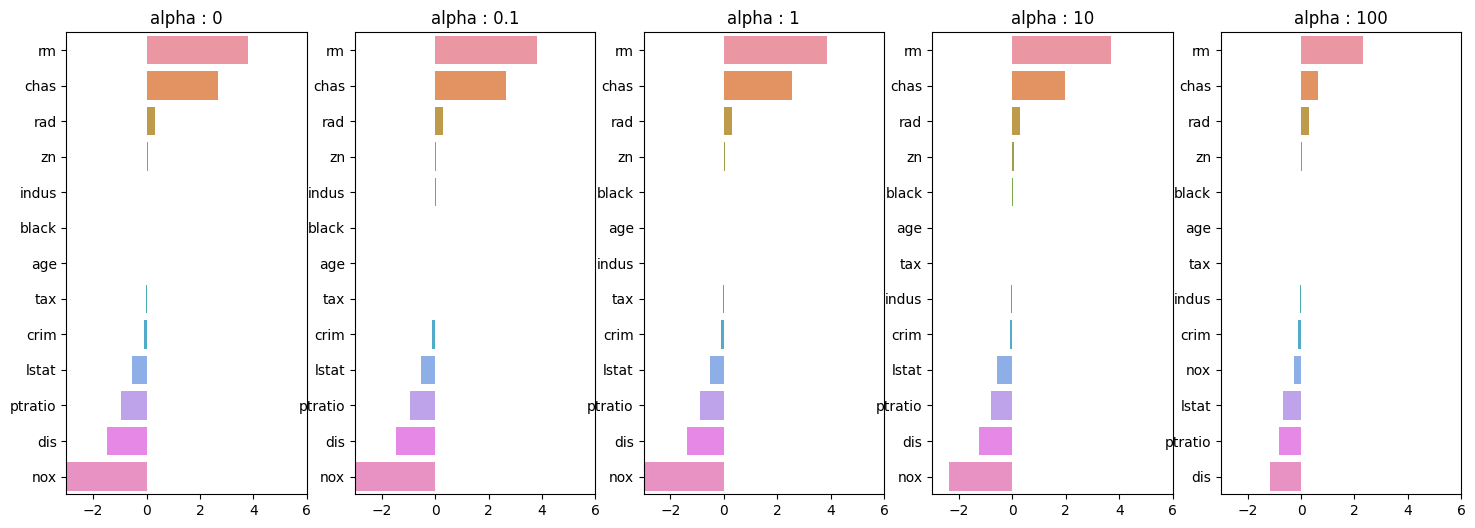

In [13]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된  matplotlib 축 생성
fig, axs = plt.subplots(figsize = (18, 6), nrows=1, ncols=5)

# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DF 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)

    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DF의 컬럼으로 추가
    coeff = pd.Series(data = ridge.coef_, index=X_data.columns)
    colname = 'alpha : ' + str(alpha)
    coeff_df[colname] = coeff

    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화.
    # 회귀 계수 값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])


# for문 바깥에서 matplotlib의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DF로 표시
plt.show()

알파 값이 증가할수록 실제로 회귀 계수 값이 작아지는지 확인해보기

In [15]:
# 알파값에 따른 회귀 계수 출력
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_colunmn = 'alpha : ' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_colunmn, ascending=False)

,alpha : 0,alpha : 0.1,alpha : 1,alpha : 10,alpha : 100
rm,3.809865,3.818233,3.854000,3.702272,2.334536
chas,2.686734,2.670019,2.552393,1.952021,0.638335
rad,0.306049,0.303515,0.290142,0.279596,0.315358
zn,0.046420,0.046572,0.047443,0.049579,0.054496
indus,0.020559,0.015999,-0.008805,-0.042962,-0.052826
black,0.009312,0.009368,0.009673,0.010037,0.009393
age,0.000692,-0.000269,-0.005415,-0.010707,0.001212
tax,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
crim,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
lstat,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


릿지 회귀에서 알파값이 증가할수록 NOX값이 갑소하여서 다른 회귀 계수 값들과 스케일이 비슷해졌다.

이로 인해 기존 회귀 모델이 성능이 개선되었다

## sklearn.linear_model.Lasso

* _class_ sklearn.linear_model.Lasso(_alpha=1.0_, _*_, _fit_intercept=True_, _precompute=False_, _copy_X=True_, _max_iter=1000_, _tol=0.0001_, _warm_start=False_, _positive=False_, _random_state=None_, _selection='cyclic'_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/364c77e04/sklearn/linear_model/_coordinate_descent.py#L1081)[¶](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso "Permalink to this definition")

> 라쏘 회귀

평균 RMSE, 회귀 계수 값들을 반환해주는 함수 이용

In [22]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고, 회귀계수 값들을 DF로 반환해주는 함수

def get_linear_reg_eval(model_name, params = None, X_data_n = None, y_target_n = None, verbose = True) :
    coeff_df = pd.DataFrame()

    if verbose : print ('####### ', model_name , '#######')

    for param in params :
        if model_name == 'Ridge' : model = Ridge(alpha=param)
        elif model_name == 'Lasso' : model = Lasso(alpha=param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        
        print(f'alpha {param}일 때 5 폴드 세트의 평균 RSME : {avg_rmse:.3f}')


        # cross_cal_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data, y_target)

        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DF의 컬럼으로 추가
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname = 'alpha : ' + str(param)
        coeff_df[colname] = coeff

    return coeff_df

# end of get_linear_reg_eval

In [23]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
Lasso_alphas = [0.07, 0.1, 0.5, 1, 3]

coeff_lasso_df = get_linear_reg_eval('Lasso', params=Lasso_alphas, X_data_n=X_data, y_target_n = y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RSME : 5.612
alpha 0.1일 때 5 폴드 세트의 평균 RSME : 5.615
alpha 0.5일 때 5 폴드 세트의 평균 RSME : 5.669
alpha 1일 때 5 폴드 세트의 평균 RSME : 5.776
alpha 3일 때 5 폴드 세트의 평균 RSME : 6.189


alpha값이  0.07 일 때 RMSE가 가장 좋다

라쏘는 알파 값이 증가되면 특정 피처의 회귀 계수를 0으로 만들어서 해당 피처를 회귀식에서 제외시켜 버린다

In [24]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DF 출력
sort_colunmn = 'alpha : ' + str(Lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_colunmn, ascending=False)

,alpha : 0.07,alpha : 0.1,alpha : 0.5,alpha : 1,alpha : 3
rm,3.789725,3.703202,2.498212,0.949811,0.000000
chas,1.434343,0.955190,0.000000,0.000000,0.000000
rad,0.270936,0.274707,0.277451,0.264206,0.061864
zn,0.049059,0.049211,0.049544,0.049165,0.037231
black,0.010248,0.010249,0.009469,0.008247,0.006510
nox,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
age,-0.011706,-0.010037,0.003604,0.020910,0.042495
tax,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
indus,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
crim,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


알파값 0.5 이상일 때 CHAS 회귀 계수 0으로 만들어버림

알파값 0.07 부터 NOX 회귀 계수 값을 0으로 만들어버림

## sklearn.linear_model.ElasticNet

* _class_ sklearn.linear_model.ElasticNet(_alpha=1.0_,  _*_,  _l1_ratio=0.5_,  _fit_intercept=True_,  _precompute=False_,  _max_iter=1000_,  _copy_X=True_,  _tol=0.0001_,  _warm_start=False_,  _positive=False_,  _random_state=None_,  _selection='cyclic'_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/364c77e04/sklearn/linear_model/_coordinate_descent.py#L663)[](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet "Permalink to this definition")

> 엘라스틱넷 회귀

In [26]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RSME : 5.542
alpha 0.1일 때 5 폴드 세트의 평균 RSME : 5.526
alpha 0.5일 때 5 폴드 세트의 평균 RSME : 5.467
alpha 1일 때 5 폴드 세트의 평균 RSME : 5.597
alpha 3일 때 5 폴드 세트의 평균 RSME : 6.068


알파값이 0.5일때 RMSE가 가장 좋다

In [28]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DF출력
sort_colunmn = 'alpha : ' + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_colunmn, ascending=False)

,alpha : 0.07,alpha : 0.1,alpha : 0.5,alpha : 1,alpha : 3
rm,3.574162,3.414154,1.918419,0.938789,0.000000
chas,1.330724,0.979706,0.000000,0.000000,0.000000
rad,0.278880,0.283443,0.300761,0.289299,0.146846
zn,0.050107,0.050617,0.052878,0.052136,0.038268
black,0.010122,0.010067,0.009114,0.008320,0.007020
age,-0.010116,-0.008276,0.007760,0.020348,0.043446
tax,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
indus,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
crim,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
nox,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


엘라스틱넷 회귀는 릿지와 라쏘가 적절히 조합된 회귀를 만들어 준다